In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns

In [2]:
df = pd.read_csv('datahouse20.csv')

In [3]:
df2 = df.drop_duplicates()

In [4]:
df2.isnull().sum()
df3=df2.dropna()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df3['bedrooms'].values.reshape(-1,1)
y = df3['size'].values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
model.coef_

array([419.22359487])

In [8]:
model.intercept_

195.16180993547732

C:\Users\fahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


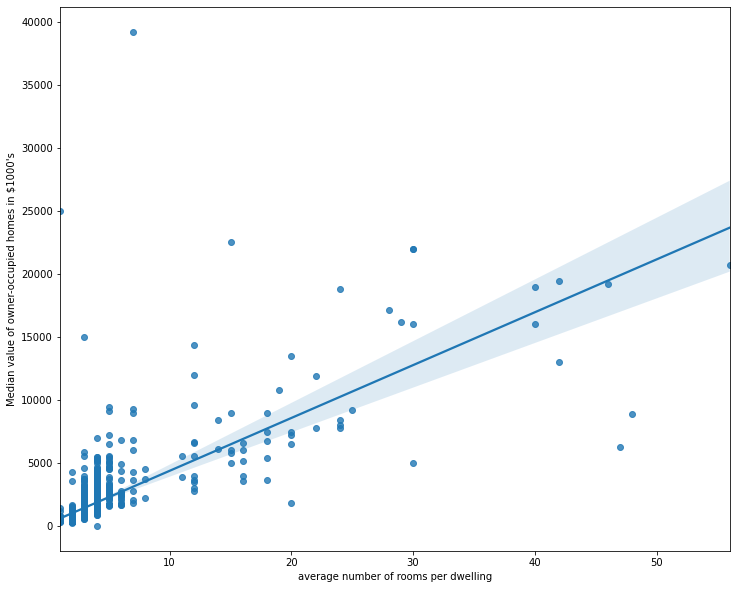

In [9]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

In [10]:
df3.corr()

,bedrooms,bath,size,price
bedrooms,1.000000,0.695694,0.717621,0.181217
bath,0.695694,1.000000,0.685373,0.219184
size,0.717621,0.685373,1.000000,0.287547
price,0.181217,0.219184,0.287547,1.000000


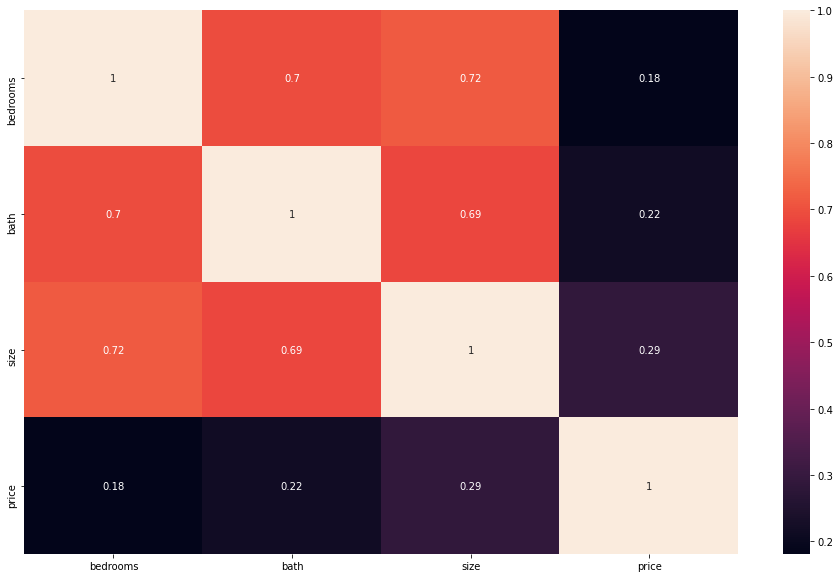

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [12]:
X = df3['bedrooms'].values.reshape(-1,1)
y = df3['size'].values

In [13]:
from sklearn.linear_model import RANSACRegressor

In [14]:
ransac = RANSACRegressor()

In [15]:
ransac.fit(X, y)

RANSACRegressor()

In [16]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [17]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [18]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

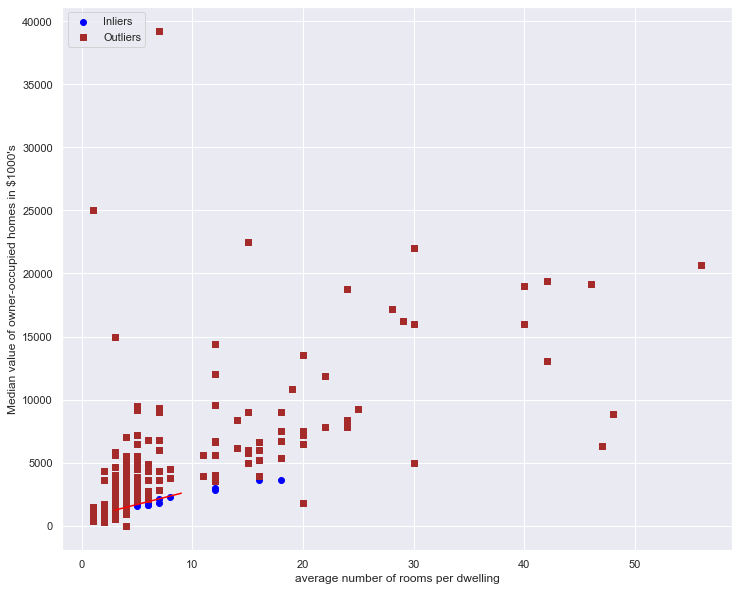

In [19]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df3['loc'] = df2['location'].str.split(',',n=1,expand=True)

ValueError: Wrong number of items passed 2, placement implies 1

In [22]:
df4=df3.drop(columns=['location'])

In [23]:
df4

,bedrooms,bath,size,price
0,3.0,2.0,1750,9500000
1,3.0,2.0,1615,9500000
3,2.0,2.0,807,5200000
4,4.0,4.0,3100,40000000
5,3.0,3.0,1300,6600000
...,...,...,...,...
8715,3.0,2.0,1025,4000000
8716,4.0,4.0,3000,32500000
8717,3.0,4.0,1695,13500000
8718,3.0,3.0,1150,4500000


In [24]:
X = df4.iloc[:, :-1].values

In [25]:
X

array([[   3.,    2., 1750.],
       [   3.,    2., 1615.],
       [   2.,    2.,  807.],
       ...,
       [   3.,    4., 1695.],
       [   3.,    3., 1150.],
       [   3.,    3., 1550.]])

In [26]:
y = df4['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_train_pred = lr.predict(X_train)

In [30]:
y_test_pred = lr.predict(X_test)

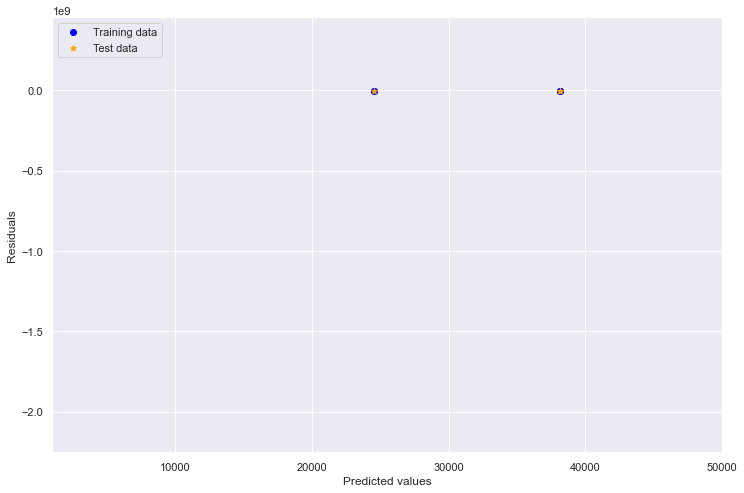

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([1000, 50000])
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_train, y_train_pred)

2205438526580538.0

In [34]:
mean_squared_error(y_test, y_test_pred)

4265973886226338.0

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_train, y_train_pred)

0.1133357239609386

In [37]:
r2_score(y_test, y_test_pred)

0.008703113382556027

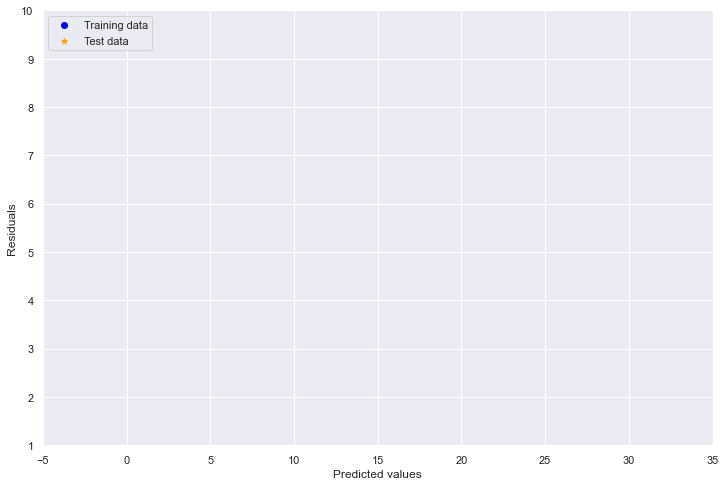

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([1, 10])
plt.show()

In [39]:
mean_squared_error(y_train, y_train_pred)

2205438526580538.0

In [40]:
mean_squared_error(y_test, y_test_pred)

4265973886226338.0

In [41]:
r2_score(y_train, y_train_pred)

0.1133357239609386

In [42]:
r2_score(y_test, y_test_pred)

0.008703113382556027

In [43]:
df3

,location,bedrooms,bath,size,price
0,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1750,9500000
1,"MotijheelExtension,Motijheel,Dhaka",3.0,2.0,1615,9500000
3,"Sector5,Uttara,Dhaka",2.0,2.0,807,5200000
4,"BlockG,BashundharaR-A,Dhaka",4.0,4.0,3100,40000000
5,"EastManiknagar,Maniknagar,Dhaka",3.0,3.0,1300,6600000
...,...,...,...,...,...
8715,"MiddlePaikpara,Mirpur,Dhaka",3.0,2.0,1025,4000000
8716,"Sector13,Uttara,Dhaka",4.0,4.0,3000,32500000
8717,"BlockF,BashundharaR-A,Dhaka",3.0,4.0,1695,13500000
8718,"Section12,Mirpur,Dhaka",3.0,3.0,1150,4500000


In [44]:
df4=df3.drop(['location'],axis='columns')

In [45]:
dummies = pd.get_dummies(df4.loc)

In [46]:
df5=df4.drop(['loc'],axis='columns')

KeyError: "['loc'] not found in axis"

In [47]:
X = df5.drop(['price'],axis='columns')

NameError: name 'df5' is not defined

In [48]:
y = df5.price

NameError: name 'df5' is not defined

In [49]:
df6=df5.drop(['price'],axis='columns')

NameError: name 'df5' is not defined

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.00870311, 0.50429478, 0.0199399 , 0.54373418, 0.30610164])

In [51]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.276555,{'normalize': True}
1,lasso,0.276555,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.992310,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
_model = DecisionTreeRegressor()
_model.fit(train_X, train_y)
_model.predict(X)

array([ 9500000.        ,  9500000.        ,  5200000.        , ...,
       13500000.        ,  6330128.20512821, 10237235.29411765])

In [53]:
print("Making predictions for the following 5 houses:")
print(df6.head(10))
print("The predictions are")
print(_model.predict(df6.head(10)))

Making predictions for the following 5 houses:


NameError: name 'df6' is not defined

In [54]:
def predict_price(location,sqft,bath,bhk):    
    l

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return _model.predict([x])[0]

In [55]:
predict_price('Sector10',2000, 3, 3)

NameError: name 'l' is not defined

In [56]:
predict_price('Sector10',2000, 3, 3)

NameError: name 'l' is not defined

In [57]:
_model.predict(X)

array([ 9500000.        ,  9500000.        ,  5200000.        , ...,
       13500000.        ,  6330128.20512821, 10237235.29411765])